<a href="https://colab.research.google.com/github/LucasMirandaD/Gestion-de-Datos/blob/main/LM_Competencia_Ausentismo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ayuda -> Caso_Ausentismo_de_Turnos_2023

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Preprocesamiento

In [2]:
datos= pd.read_csv('https://raw.githubusercontent.com/profcarlosamartinez/mineria_datos/main/ausentismo_2023/datos_train.csv',delimiter=',',decimal='.')

In [3]:
datos.head(2)

,id,id_paciente,id_turno,sexo,dia_reserva_turno,dia_turno,cod_barrio,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos,ausente
0,1,30846,29333,F,2019-08-12 18:38:08+00:00,2019-08-12 00:00:00+00:00,40,62,0,1,0,0,0,0,0
1,2,55326,29080,M,2019-08-12 16:08:27+00:00,2019-08-12 00:00:00+00:00,40,56,0,0,0,0,0,0,0


In [4]:
datos.shape

(86000, 15)

In [5]:
datos.ausente.value_counts()

0    68230
1    17770
Name: ausente, dtype: int64

<Axes: >

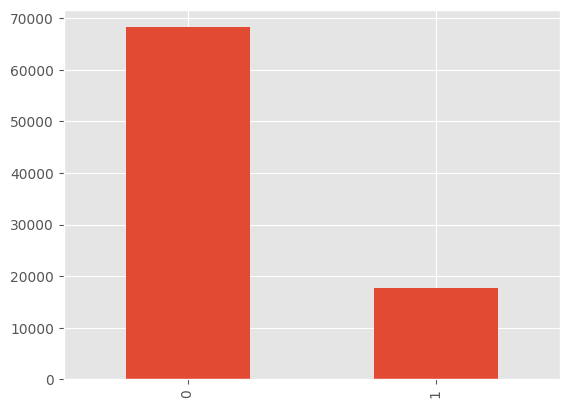

In [6]:
datos.ausente.value_counts().plot(kind='bar')

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86000 entries, 0 to 85999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 86000 non-null  int64 
 1   id_paciente        86000 non-null  int64 
 2   id_turno           86000 non-null  int64 
 3   sexo               86000 non-null  object
 4   dia_reserva_turno  86000 non-null  object
 5   dia_turno          86000 non-null  object
 6   cod_barrio         86000 non-null  int64 
 7   edad               86000 non-null  int64 
 8   plan_social        86000 non-null  int64 
 9   hipertension       86000 non-null  int64 
 10  diabetes           86000 non-null  int64 
 11  alcoholismo        86000 non-null  int64 
 12  discapacidades     86000 non-null  int64 
 13  sms_recibidos      86000 non-null  int64 
 14  ausente            86000 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 9.8+ MB


In [8]:
datos.describe()

,id,id_paciente,id_turno,cod_barrio,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos,ausente
count,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000
mean,43000.500000,31123.719977,46625.973116,42.601547,36.982860,0.098372,0.196651,0.071151,0.029837,0.022291,0.289302,0.206628
std,24826.205912,17964.921826,27585.167343,22.416531,23.100174,0.297819,0.397469,0.257079,0.170139,0.160967,0.453441,0.404889
min,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21500.750000,15614.000000,23087.750000,26.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43000.500000,31018.500000,45761.500000,40.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64500.250000,46589.000000,69626.250000,61.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,86000.000000,62299.000000,110522.000000,81.000000,115.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


In [9]:
# Convertir las variables a categóricas
datos['sexo'] = datos['sexo'].astype('category')
datos['plan_social'] = datos['plan_social'].astype('category')
datos['hipertension'] = datos['hipertension'].astype('category')
datos['diabetes'] = datos['diabetes'].astype('category')
datos['alcoholismo'] = datos['alcoholismo'].astype('category')
datos['discapacidades'] = datos['discapacidades'].astype('category')
datos['sms_recibidos'] = datos['sms_recibidos'].astype('category')
datos['ausente'] = datos['ausente'].astype('category')

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86000 entries, 0 to 85999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 86000 non-null  int64   
 1   id_paciente        86000 non-null  int64   
 2   id_turno           86000 non-null  int64   
 3   sexo               86000 non-null  category
 4   dia_reserva_turno  86000 non-null  object  
 5   dia_turno          86000 non-null  object  
 6   cod_barrio         86000 non-null  int64   
 7   edad               86000 non-null  int64   
 8   plan_social        86000 non-null  category
 9   hipertension       86000 non-null  category
 10  diabetes           86000 non-null  category
 11  alcoholismo        86000 non-null  category
 12  discapacidades     86000 non-null  category
 13  sms_recibidos      86000 non-null  category
 14  ausente            86000 non-null  category
dtypes: category(8), int64(5), object(2)
memory usage: 5.3

In [10]:
# Especificar el nuevo orden de las columnas
new_columns = ['id', 'id_paciente', 'id_turno', 'cod_barrio', 'dia_reserva_turno', 'dia_turno', 'sexo', 'edad', 'plan_social', 'hipertension', 'diabetes', 'alcoholismo', 'discapacidades', 'sms_recibidos', 'ausente']

# Reordenar las columnas utilizando reindex
datos = datos.reindex(columns=new_columns)

# Mostrar los datos actualizados
datos.head(5)

,id,id_paciente,id_turno,cod_barrio,dia_reserva_turno,dia_turno,sexo,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos,ausente
0,1,30846,29333,40,2019-08-12 18:38:08+00:00,2019-08-12 00:00:00+00:00,F,62,0,1,0,0,0,0,0
1,2,55326,29080,40,2019-08-12 16:08:27+00:00,2019-08-12 00:00:00+00:00,M,56,0,0,0,0,0,0,0
2,3,15723,29116,46,2019-08-12 16:19:04+00:00,2019-08-12 00:00:00+00:00,F,62,0,0,0,0,0,0,0
3,4,9019,29300,55,2019-08-12 17:29:31+00:00,2019-08-12 00:00:00+00:00,F,8,0,0,0,0,0,0,0
4,5,23942,29074,40,2019-08-12 16:07:23+00:00,2019-08-12 00:00:00+00:00,F,56,0,1,1,0,0,0,0


In [11]:
datos['sexo'] = datos['sexo'].replace({'F': 0, 'M': 1})

In [12]:
# Convertir las columnas de fecha en formato datetime
datos['dia_reserva_turno'] = pd.to_datetime(datos['dia_reserva_turno'])
datos['dia_turno'] = pd.to_datetime(datos['dia_turno'])

# Extraer el mes y el día de las columnas de fecha
datos['mes_reserva_turno'] = datos['dia_reserva_turno'].dt.month
datos['dia_reserva_turno'] = datos['dia_reserva_turno'].dt.day

datos['mes_turno'] = datos['dia_turno'].dt.month
datos['dia_turno'] = datos['dia_turno'].dt.day

In [13]:
X=datos.iloc[:,4:14] #antes --> X=datos.iloc[:,0:11] incluia el id
X.head(5)

,dia_reserva_turno,dia_turno,sexo,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos
0,12,12,0,62,0,1,0,0,0,0
1,12,12,1,56,0,0,0,0,0,0
2,12,12,0,62,0,0,0,0,0,0
3,12,12,0,8,0,0,0,0,0,0
4,12,12,0,56,0,1,1,0,0,0


In [14]:
y=datos.iloc[:,14:15]
y.head(7)

,ausente
0,0
1,0
2,0
3,0
4,0
5,0
6,1


**Division del conjuinto de datos**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=80)

# Clasificadores

In [16]:
modelo = DecisionTreeClassifier()
modeloLR = LogisticRegression()
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_rf = RandomForestClassifier()

In [17]:
modelo.fit(X,y)

DecisionTreeClassifier()

# **Random Forest**

In [18]:
# Diccionario de hiperparámetros para la calibración del modelo
rf_param = {
    # 'n_estimators': [50, 100, 150],  # Número de árboles en el bosque
    'n_estimators': [10],
    'criterion': ['gini', 'entropy'],  # Criterio de selección de características
    'max_depth': [None, 5, 10],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en cada hoja del árbol
}

In [19]:
# Calibración del modelo con GridSearchCV
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=80)
grid_rf = GridSearchCV(
    modelo_rf,
    param_grid=rf_param,
    cv=kfold,
    verbose=1
)
grid_rf.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=80, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10]},
             verbose=1)

In [20]:
# Obtener los mejores parámetros y el mejor estimador
best_params_rf = grid_rf.best_params_
best_estimator_rf = grid_rf.best_estimator_

In [21]:
# Entrenar el modelo final con los mejores parámetros
modelo_rf_final = best_estimator_rf.fit(X_train, y_train)

<ipython-input-21-26911fa12bc9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_rf_final = best_estimator_rf.fit(X_train, y_train)


In [22]:
# Validación del modelo final
y_pred_rf = modelo_rf_final.predict(X_test)

In [23]:
# Matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de confusión (Random Forest):\n", conf_matrix_rf)

Matriz de confusión (Random Forest):
 [[20450    43]
 [ 5279    28]]


In [24]:
# Otras métricas de evaluación
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

print("Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1 Score (Random Forest):", f1_score_rf)

Accuracy (Random Forest): 0.7937209302325582
Precision (Random Forest): 0.39436619718309857
Recall (Random Forest): 0.0052760504993404934
F1 Score (Random Forest): 0.010412792859799182


In [25]:
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)
print("Kappa score: ", kappa_rf)

Kappa score:  0.005008782467291861


In [26]:
grid_rf.best_score_

0.7933222591362126

# DecisionTreeClasifier

In [43]:
tree_param = {
    'criterion': ['entropy','gini'],
    'max_depth': range(1,10),
    'min_samples_leaf': range(1,10)
}

In [44]:
grid = GridSearchCV(
    modelo,
    param_grid= tree_param,
    # cv=10,
    cv=kfold,
    # scoring='f1',
    verbose=1
)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=80, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10)},
             verbose=1)

In [45]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}

In [46]:
grid.best_score_

0.793156146179402

In [47]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [48]:
modelo_f=grid.best_estimator_

Prediccion

In [51]:
y_pred_Tree = modelo_f.predict(X_test)

In [52]:
kappa = cohen_kappa_score(y_test, y_pred_Tree)
print("Kappa score: ", kappa)

Kappa score:  0.0010077710422538022


In [53]:
# Otras métricas de evaluación
accuracy_rf = accuracy_score(y_test, y_pred_Tree)
precision_rf = precision_score(y_test, y_pred_Tree)
recall_rf = recall_score(y_test, y_pred_Tree)
f1_score_rf = f1_score(y_test, y_pred_Tree)

print("Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1 Score (Random Forest):", f1_score_rf)

Accuracy (Random Forest): 0.794031007751938
Precision (Random Forest): 0.3333333333333333
Recall (Random Forest): 0.0013190126248351234
F1 Score (Random Forest): 0.0026276276276276274


# LogisticRegression

In [54]:
# Crear el modelo de Logistic Regression
model_lr = LogisticRegression( solver='liblinear')

# Definir los hiperparámetros a ajustar
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Realizar Grid Search para encontrar los mejores hiperparámetros
grid_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, scoring='roc_auc', cv=5)
grid.fit(X_train, y_train)

# Obtener el mejor modelo con los mejores hiperparámetros
final_model_lr = grid.best_estimator_

# Realizar predicciones en los datos de prueba utilizando el mejor modelo
y_pred_lr = final_model_lr.predict(X_test)

# Probabilidades de predicción
y_pred_proba = final_model_lr.predict_proba(X_test)[:, 1]



Fitting 10 folds for each of 162 candidates, totalling 1620 fits


In [55]:
# Evaluar el rendimiento del modelo
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.89     20493
           1       0.33      0.00      0.00      5307

    accuracy                           0.79     25800
   macro avg       0.56      0.50      0.44     25800
weighted avg       0.70      0.79      0.70     25800



In [56]:
# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.6694665951048688


In [57]:
# Mejores hiperparámetros encontrados por Grid Search
print("Best Parameters:", grid.best_params_)

print("Best Score:", grid.best_score_)

kappa = cohen_kappa_score(y_test, y_pred_lr)
print("Kappa score: ", kappa)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}
Best Score: 0.793156146179402
Kappa score:  0.0010077710422538022


In [58]:
# Otras métricas de evaluación
accuracy_rf = accuracy_score(y_test, y_pred_lr)
precision_rf = precision_score(y_test, y_pred_lr)
recall_rf = recall_score(y_test, y_pred_lr)
f1_score_rf = f1_score(y_test, y_pred_lr)

print("Accuracy (DecisionTreeClasifier):", accuracy_rf)
print("Precision (DecisionTreeClasifier):", precision_rf)
print("Recall (DecisionTreeClasifier):", recall_rf)
print("F1 Score (DecisionTreeClasifier):", f1_score_rf)

Accuracy (DecisionTreeClasifier): 0.794031007751938
Precision (DecisionTreeClasifier): 0.3333333333333333
Recall (DecisionTreeClasifier): 0.0013190126248351234
F1 Score (DecisionTreeClasifier): 0.0026276276276276274


# Leer nuevas instancias a predecir

In [27]:
nuevas_instancias_pd= pd.read_csv('https://raw.githubusercontent.com/profcarlosamartinez/mineria_datos/main/ausentismo_2023/nuevas_instancias_a_predecir.csv',delimiter=',',decimal='.')

In [28]:
nuevas_instancias_pd.shape

(24527, 14)

In [29]:
nuevas_instancias_pd['sexo'] = nuevas_instancias_pd['sexo'].replace({'F': 0, 'M': 1})

In [30]:
nuevas_instancias_pd.head(5)

,id,id_paciente,id_turno,sexo,dia_reserva_turno,dia_turno,cod_barrio,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos
0,1,62227,4649,1,2019-07-15 17:14:49+00:00,2019-09-14 00:00:00+00:00,39,15,0,0,0,0,0,1
1,2,43027,12844,1,2019-08-02 07:29:05+00:00,2019-09-21 00:00:00+00:00,39,15,0,0,0,0,0,1
2,3,36016,97746,1,2019-09-14 08:41:06+00:00,2019-09-14 00:00:00+00:00,39,1,0,0,0,0,0,0
3,4,60526,7833,0,2019-07-25 17:47:25+00:00,2019-09-14 00:00:00+00:00,39,11,0,0,0,0,0,1
4,5,2706,97985,0,2019-09-14 09:25:07+00:00,2019-09-14 00:00:00+00:00,39,1,0,0,0,0,0,0


In [31]:
nuevas_instancias_pd['sexo'] = nuevas_instancias_pd['sexo'].astype('category')
nuevas_instancias_pd['edad'] = nuevas_instancias_pd['edad'].astype('category')
nuevas_instancias_pd['plan_social'] = nuevas_instancias_pd['plan_social'].astype('category')
nuevas_instancias_pd['hipertension'] = nuevas_instancias_pd['hipertension'].astype('category')
nuevas_instancias_pd['diabetes'] = nuevas_instancias_pd['diabetes'].astype('category')
nuevas_instancias_pd['alcoholismo'] = nuevas_instancias_pd['alcoholismo'].astype('category')
nuevas_instancias_pd['discapacidades'] = nuevas_instancias_pd['discapacidades'].astype('category')
nuevas_instancias_pd['sms_recibidos'] = nuevas_instancias_pd['sms_recibidos'].astype('category')


In [32]:
# Especificar el nuevo orden de las columnas
new_columns = ['id', 'id_paciente', 'id_turno', 'cod_barrio', 'dia_reserva_turno', 'dia_turno', 'sexo', 'edad', 'plan_social', 'hipertension', 'diabetes', 'alcoholismo', 'discapacidades', 'sms_recibidos', 'ausente']

# Convertir las columnas de fecha en formato datetime
nuevas_instancias_pd['dia_reserva_turno'] = pd.to_datetime(nuevas_instancias_pd['dia_reserva_turno'])
nuevas_instancias_pd['dia_turno'] = pd.to_datetime(nuevas_instancias_pd['dia_turno'])

# Extraer el mes y el día de las columnas de fecha
nuevas_instancias_pd['mes_reserva_turno'] = nuevas_instancias_pd['dia_reserva_turno'].dt.month
nuevas_instancias_pd['dia_reserva_turno'] = nuevas_instancias_pd['dia_reserva_turno'].dt.day

nuevas_instancias_pd['mes_turno'] = nuevas_instancias_pd['dia_turno'].dt.month
nuevas_instancias_pd['dia_turno'] = nuevas_instancias_pd['dia_turno'].dt.day

In [33]:
# Reordenar las columnas utilizando reindex
nuevas_instancias_pd = nuevas_instancias_pd.reindex(columns=new_columns)
nuevas_instancias_pd = nuevas_instancias_pd[['dia_reserva_turno','dia_turno','sexo', 'edad', 'plan_social', 'hipertension', 'diabetes', 'alcoholismo', 'discapacidades', 'sms_recibidos']]

nuevas_instancias_pd.tail(2)

,dia_reserva_turno,dia_turno,sexo,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos
24525,10,20,0,38,0,0,0,0,0,1
24526,10,20,0,54,0,0,0,0,0,1


# Clasificacion


In [34]:
prediccion_nuevos_individuos=modelo.predict(nuevas_instancias_pd)

In [35]:
datos_clasificados=pd.DataFrame(prediccion_nuevos_individuos)

In [36]:
datos_clasificados.index = datos_clasificados.index + 1

In [37]:
datos_clasificados.tail(3)

,0
24525,0
24526,0
24527,0


In [38]:
datos_clasificados.columns = ['Predicted']
datos_clasificados.index.names = ['id']

In [39]:
datos_clasificados.columns

Index(['Predicted'], dtype='object')

In [40]:
datos_clasificados.head(2)

,Predicted
id,
1,0
2,0


In [41]:
from google.colab import files

In [42]:
datos_clasificados.to_csv('predicted.csv',sep=',')
files.download('predicted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>